In [1]:
# For inline plotting
%matplotlib inline

# For auto reloading
%load_ext autoreload
%autoreload 2


In [2]:
import pickle
from pathlib import Path

from mab import GleapAgent, GleapEpsilonGreedyAgent, UcbAgent, UniformlyRandomAgent
import simulation_config


# Load all the simulation objects
# date = "20210820_211900"
# date = "20210828_142054"
# date = "20210828_201219"
# date = "20210830_092310"
# date = "20220126_231919"
# date = "20220127_145443"
# date = "20220127_223728"
# date = "20220222_193909"
date = "20220713_162932"
simulation_list = []
pathlist = Path("./simulations_data/v/{:s}".format(date)).glob('*.pkl')
for path in pathlist:
    with open(path, "rb") as f:
        simulation_list.append(pickle.load(f))


# Sort the simulation list
def value_func(simulation_index):
    simulation = simulation_list[simulation_index]
    agent = simulation.agent
    
    # Assume that the parameters are smaller than max_param
    max_param = 1000000.0
    value = 0.0
    if isinstance(agent, GleapAgent):
        value += 4 * max_param
        value += agent.v
        
        if agent.v < 1.0:
            agent.name = "$\mathbf{{V = {:.1f}}}$".format(agent.v)
        else:
            agent.name = "$\mathbf{{V = {:d}}}$".format(int(agent.v))
    elif isinstance(agent, GleapEpsilonGreedyAgent):
        value += 3 * max_param
        value += agent.epsilon
    elif isinstance(agent, UcbAgent):
        value += 2 * max_param
        value += agent.lamb
    elif isinstance(agent, UniformlyRandomAgent):
        value += 1 * max_param
        
        agent.name = "Random"
    
    return value


simulation_index_list = [ i for i in range(len(simulation_list)) ]
sorted_simulation_index_list = sorted(simulation_index_list, key=lambda i: value_func(i))
for simulation_index in sorted_simulation_index_list:
    simulation = simulation_list[simulation_index]
    print(simulation.agent.name)


$\mathbf{V = 50}$
$\mathbf{V = 100}$
$\mathbf{V = 150}$
$\mathbf{V = 200}$
$\mathbf{V = 250}$
$\mathbf{V = 300}$
$\mathbf{V = 350}$
$\mathbf{V = 400}$
$\mathbf{V = 450}$
$\mathbf{V = 500}$


In [3]:
import math
from pathlib import Path
import shutil

import numpy as np
import matplotlib
print("matplotlib.__version__:", matplotlib.__version__)
print('Default backend: ' + matplotlib.get_backend())
# matplotlib.use("module://mplcairo.base")
print('Backend is now ' + matplotlib.get_backend())
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from mab import GleapAgent, GleapEpsilonGreedyAgent


def calculate_metrics(simulation_index):
    simulation = simulation_list[simulation_index]
    
    # For reward
    time_averaged_compound_reward_array = np.mean(simulation.time_averaged_compound_reward_2darray, axis=0)
    aggregated_compound_reward_array = np.mean(simulation.aggregated_compound_reward_2darray, axis=0)
    
    # For regret
    time_averaged_regret_array = np.mean(simulation.time_averaged_regret_2darray, axis=0)
    cumulative_regret_array = np.mean(simulation.cumulative_regret_2darray, axis=0)
    
    # For time-averaged total prediction accuracy
    time_averaged_total_prediction_accuracy_array = np.mean(simulation.time_averaged_total_prediction_accuracy_2darray, axis=0)
    
    # For queue length
    q_array = np.mean(simulation.q_2darray, axis=0)
    
    # For user satisfaction
    time_averaged_user_satisfaction_array = np.mean(simulation.time_averaged_user_satisfaction_2darray, axis=0)
    
    # For time-averaged total prediction latency
    time_averaged_total_prediction_latency_array = np.mean(simulation.time_averaged_total_prediction_latency_2darray, axis=0)
    
    # For time-averaged energy consumption
    time_averaged_energy_consumption_array = np.mean(simulation.time_averaged_energy_consumption_2darray, axis=0)
    
    return {\
            "time_averaged_compound_reward_array": time_averaged_compound_reward_array,\
            "aggregated_compound_reward_array": aggregated_compound_reward_array,\
            "time_averaged_regret_array": time_averaged_regret_array,\
            "cumulative_regret_array": cumulative_regret_array,\
            "time_averaged_total_prediction_accuracy_array": time_averaged_total_prediction_accuracy_array,\
            "q_array": q_array,\
            "time_averaged_user_satisfaction_array": time_averaged_user_satisfaction_array,\
            "time_averaged_total_prediction_latency_array": time_averaged_total_prediction_latency_array,\
            "time_averaged_energy_consumption_array": time_averaged_energy_consumption_array\
           }


def plot_v_simulations():
    # Hyperparameters for plotting
    MARK_EVERY = (1000, 2000)
    MARKER_SIZE = 25.0
    MARKER_SIZE_CHINESE = 14.0
    LINE_WIDTH = 6.0
    LINE_WIDTH_CHINESE = 3.0
    FONT_SIZE = 36.0
    FONT_SIZE_CHINESE = 32.0
    FONT_SIZE_TICK = 32.0
    FONT_SIZE_TICK_CHINESE = 26.0
    FONT_SIZE_TICK_OFFSET_TEXT = 28.0
    FONT_SIZE_TICK_OFFSET_TEXT_CHINESE = 24.0
    FIG_SIZE = (16,9)
    FIG_SIZE_CHINESE = (8,6)
    DPI = 120
    DPI_CHINESE = 300
    GRID = True
    GRID_LINE_STYLE = (0,(8,4))
    FONT_WEIGHT = "normal"
    LOG_SCALE = False
    CHINESE_FONT_WEIGHT = "normal"
    if CHINESE_FONT_WEIGHT == "bold":
        CHINESE_FP = fm.FontProperties(fname='./font/source_han_serif_sc_bold.otf', math_fontfamily="stix")
    else:
        CHINESE_FP = fm.FontProperties(fname='./font/source_han_serif_sc_regular.otf', math_fontfamily="stix")
    SAVE_CHINESE_PDF = True
    
    
    # mkdir
    figure_path = Path("./simulations_data/v/{:s}/figures".format(date))
    figure_path.mkdir(parents=True, exist_ok=True)
    shutil.rmtree(figure_path)
    figure_path.mkdir(parents=True, exist_ok=True)
    chinese_figure_path = Path("./simulations_data/v/{:s}/chinese_figures".format(date))
    chinese_figure_path.mkdir(parents=True, exist_ok=True)
    shutil.rmtree(chinese_figure_path)
    chinese_figure_path.mkdir(parents=True, exist_ok=True)
    
    
    # Prepare the data
    num_simulations = len(sorted_simulation_index_list)
    v_array = np.zeros(num_simulations, dtype=float)
    converged_time_averaged_regret_array = np.zeros(num_simulations, dtype=float)
    converged_time_averaged_compound_reward_array = np.zeros(num_simulations, dtype=float)
    my_cumulative_regret_array = np.zeros(num_simulations, dtype=float)
    converged_q_array = np.zeros(num_simulations, dtype=float)
    for index, simulation_index in enumerate(sorted_simulation_index_list):
        v_array[index] = simulation_list[simulation_index].agent.v
        
        metrics = calculate_metrics(simulation_index)
        time_averaged_compound_reward_array = metrics["time_averaged_compound_reward_array"]
        time_averaged_regret_array = metrics["time_averaged_regret_array"]
        cumulative_regret_array = metrics["cumulative_regret_array"]
        q_array = metrics["q_array"]
        
        converged_time_averaged_compound_reward_array[index] = time_averaged_compound_reward_array[-1]
        converged_time_averaged_regret_array[index] = time_averaged_regret_array[-1]
        my_cumulative_regret_array[index] = cumulative_regret_array[-1]
        converged_q_array[index] = q_array[-1]
    
    
    ##########################################################################################
    # Beginning for reward and queue length
    
    fig, ax_reward = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    if LOG_SCALE:
        ax_reward.set_xlabel(r'$\log_{10} V$', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    else:
        ax_reward.set_xlabel(r'$V$', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax_reward.set_ylabel(r'Average Reward', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT, color="#0072B2")
    ax_reward.tick_params(axis='y', labelcolor="#0072B2")
    if LOG_SCALE:
        ax_reward.plot(np.log10(v_array), converged_time_averaged_compound_reward_array, 'o', markevery=1, linestyle='-', color="#0072B2", label="Converged Average Reward", markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
    else:
        ax_reward.plot(v_array, converged_time_averaged_compound_reward_array, 'o', markevery=1, linestyle='-', color="#0072B2", label="Converged Average Reward", markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(-2, -2))
    
    ax_q = ax_reward.twinx()
    plt.setp(ax_q.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    ax_q.set_ylabel(r'Queue Length', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT, color="#96281b")
    ax_q.tick_params(axis='y', labelcolor="#96281b")
    if LOG_SCALE:
        ax_q.plot(np.log10(v_array), converged_q_array, 's', markevery=1, linestyle='-', color="#96281b", label="Converged Queue Length", markersize=MARKER_SIZE, linewidth=LINE_WIDTH, zorder=10)
    else:
        ax_q.plot(v_array, converged_q_array, 's', markevery=1, linestyle='-', color="#96281b", label="Converged Queue Length", markersize=MARKER_SIZE, linewidth=LINE_WIDTH, zorder=10)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 2))
    
#     plt.ticklabel_format(style='sci', axis='x', scilimits=(3, 3))
    
    plt.grid(GRID, linestyle=GRID_LINE_STYLE, zorder=0)
#     plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0), useMathText=True)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
    plt.setp(ax_reward.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax_reward.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax_q.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
#     plt.setp(ax_reward.xaxis.get_offset_text(), fontsize=FONT_SIZE_TICK_OFFSET_TEXT, fontweight=FONT_WEIGHT)
#     plt.setp(ax_reward.yaxis.get_offset_text(), fontsize=FONT_SIZE_TICK_OFFSET_TEXT, fontweight=FONT_WEIGHT)
#     plt.setp(ax_q.yaxis.get_offset_text(), fontsize=FONT_SIZE_TICK_OFFSET_TEXT, fontweight=FONT_WEIGHT)
    fig.tight_layout()
    fig.savefig('./simulations_data/v/{:s}/figures/fig_v_simulations_reward.png'.format(date), format='png', bbox_inches='tight')
    fig.savefig('./simulations_data/v/{:s}/figures/fig_v_simulations_reward.pdf'.format(date), format='pdf', bbox_inches='tight')
    
    # For the Chinese version
    
    fig, ax_reward = plt.subplots(figsize=FIG_SIZE_CHINESE, dpi=DPI_CHINESE)
    if LOG_SCALE:
        ax_reward.set_xlabel(r'$\log_{10} V$', fontsize=FONT_SIZE_CHINESE, fontweight=CHINESE_FONT_WEIGHT, fontproperties=CHINESE_FP)
    else:
        ax_reward.set_xlabel(r'参数 $V$', fontsize=FONT_SIZE_CHINESE, fontweight=CHINESE_FONT_WEIGHT, fontproperties=CHINESE_FP)
    ax_reward.set_ylabel(r'平均奖励', fontsize=FONT_SIZE_CHINESE, fontweight=CHINESE_FONT_WEIGHT, color="#0072B2", fontproperties=CHINESE_FP)
    ax_reward.tick_params(axis='y', labelcolor="#0072B2")
    if LOG_SCALE:
        ax_reward.plot(np.log10(v_array), converged_time_averaged_compound_reward_array, 'o', markevery=1, linestyle='-', color="#0072B2", label="Converged Average Reward", markersize=MARKER_SIZE_CHINESE, linewidth=LINE_WIDTH_CHINESE, zorder=3)
    else:
        ax_reward.plot(v_array, converged_time_averaged_compound_reward_array, 'o', markevery=1, linestyle='-', color="#0072B2", label="Converged Average Reward", markersize=MARKER_SIZE_CHINESE, linewidth=LINE_WIDTH_CHINESE, zorder=3)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(-2, -2))
    
    ax_q = ax_reward.twinx()
    ax_q.set_ylabel(r'队列长度', fontsize=FONT_SIZE_CHINESE, fontweight=CHINESE_FONT_WEIGHT, color="#96281b", fontproperties=CHINESE_FP)
    ax_q.tick_params(axis='y', labelcolor="#96281b")
    if LOG_SCALE:
        ax_q.plot(np.log10(v_array), converged_q_array, 's', markevery=1, linestyle='-', color="#96281b", label="Converged Queue Length", markersize=MARKER_SIZE_CHINESE, linewidth=LINE_WIDTH_CHINESE)
    else:
        ax_q.plot(v_array, converged_q_array, 's', markevery=1, linestyle='-', color="#96281b", label="Converged Queue Length", markersize=MARKER_SIZE_CHINESE, linewidth=LINE_WIDTH_CHINESE)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 2))
    
#     plt.ticklabel_format(style='sci', axis='x', scilimits=(3, 3))
    
    plt.grid(GRID, linestyle=GRID_LINE_STYLE, zorder=0)
#     plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0), useMathText=True)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
    plt.setp(ax_reward.get_xticklabels(), fontsize=FONT_SIZE_TICK_CHINESE, fontweight=CHINESE_FONT_WEIGHT, fontproperties=CHINESE_FP)
    plt.setp(ax_reward.get_yticklabels(), fontsize=FONT_SIZE_TICK_CHINESE, fontweight=CHINESE_FONT_WEIGHT, fontproperties=CHINESE_FP)
    plt.setp(ax_q.get_yticklabels(), fontsize=FONT_SIZE_TICK_CHINESE, fontweight=CHINESE_FONT_WEIGHT, fontproperties=CHINESE_FP)
#     plt.setp(ax_reward.xaxis.get_offset_text(), fontsize=FONT_SIZE_TICK_OFFSET_TEXT, fontweight=FONT_WEIGHT, fontproperties=CHINESE_FP)
#     plt.setp(ax_reward.yaxis.get_offset_text(), fontsize=FONT_SIZE_TICK_OFFSET_TEXT, fontweight=FONT_WEIGHT, fontproperties=CHINESE_FP)
#     plt.setp(ax_q.yaxis.get_offset_text(), fontsize=FONT_SIZE_TICK_OFFSET_TEXT, fontweight=FONT_WEIGHT, fontproperties=CHINESE_FP)
    fig.tight_layout()
    fig.savefig('./simulations_data/v/{:s}/chinese_figures/fig_v_simulations_reward.png'.format(date), format='png', bbox_inches='tight')
    if SAVE_CHINESE_PDF:
        fig.savefig('./simulations_data/v/{:s}/chinese_figures/fig_v_simulations_reward.pdf'.format(date), format='pdf', bbox_inches='tight')
    
    
    # Ending for reward and queue length
    ##########################################################################################
    
    
    ##########################################################################################
    # Beginning for regret and queue length
    
    fig, ax_regret = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    plt.setp(ax_regret.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax_regret.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    if LOG_SCALE:
        ax_regret.set_xlabel(r'$\log_{10} V$', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    else:
        ax_regret.set_xlabel(r'$V$', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax_regret.set_ylabel(r'Average Regret', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT, color="#0072B2")
    ax_regret.tick_params(axis='y', labelcolor="#0072B2")
    if LOG_SCALE:
        ax_regret.plot(np.log10(v_array), converged_time_averaged_regret_array, 'o', markevery=5, linestyle='-', color="#0072B2", label="Converged Average Regret", markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
    else:
        ax_regret.plot(v_array, converged_time_averaged_regret_array, 'o', markevery=5, linestyle='-', color="#0072B2", label="Converged Average Regret", markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(-2, -2))
    
    ax_q = ax_regret.twinx()
    plt.setp(ax_q.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    ax_q.set_ylabel(r'Queue Length', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT, color="#96281b")
    ax_q.tick_params(axis='y', labelcolor="#96281b")
    if LOG_SCALE:
        ax_q.plot(np.log10(v_array), converged_q_array, 's', markevery=5, linestyle='-', color="#96281b", label="Converged Queue Length", markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
    else:
        ax_q.plot(v_array, converged_q_array, 's', markevery=5, linestyle='-', color="#96281b", label="Converged Queue Length", markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 2))
    
#     plt.ticklabel_format(style='sci', axis='x', scilimits=(3, 3))
    
    plt.grid(GRID, linestyle=GRID_LINE_STYLE)
    fig.tight_layout()
    fig.savefig('./simulations_data/v/{:s}/figures/fig_v_simulations_regret.png'.format(date), format='png', bbox_inches='tight')
    fig.savefig('./simulations_data/v/{:s}/figures/fig_v_simulations_regret.pdf'.format(date), format='pdf', bbox_inches='tight')
    
    
    # Ending for regret and queue length
    ##########################################################################################


matplotlib.__version__: 3.5.1
Default backend: module://matplotlib_inline.backend_inline
Backend is now module://matplotlib_inline.backend_inline


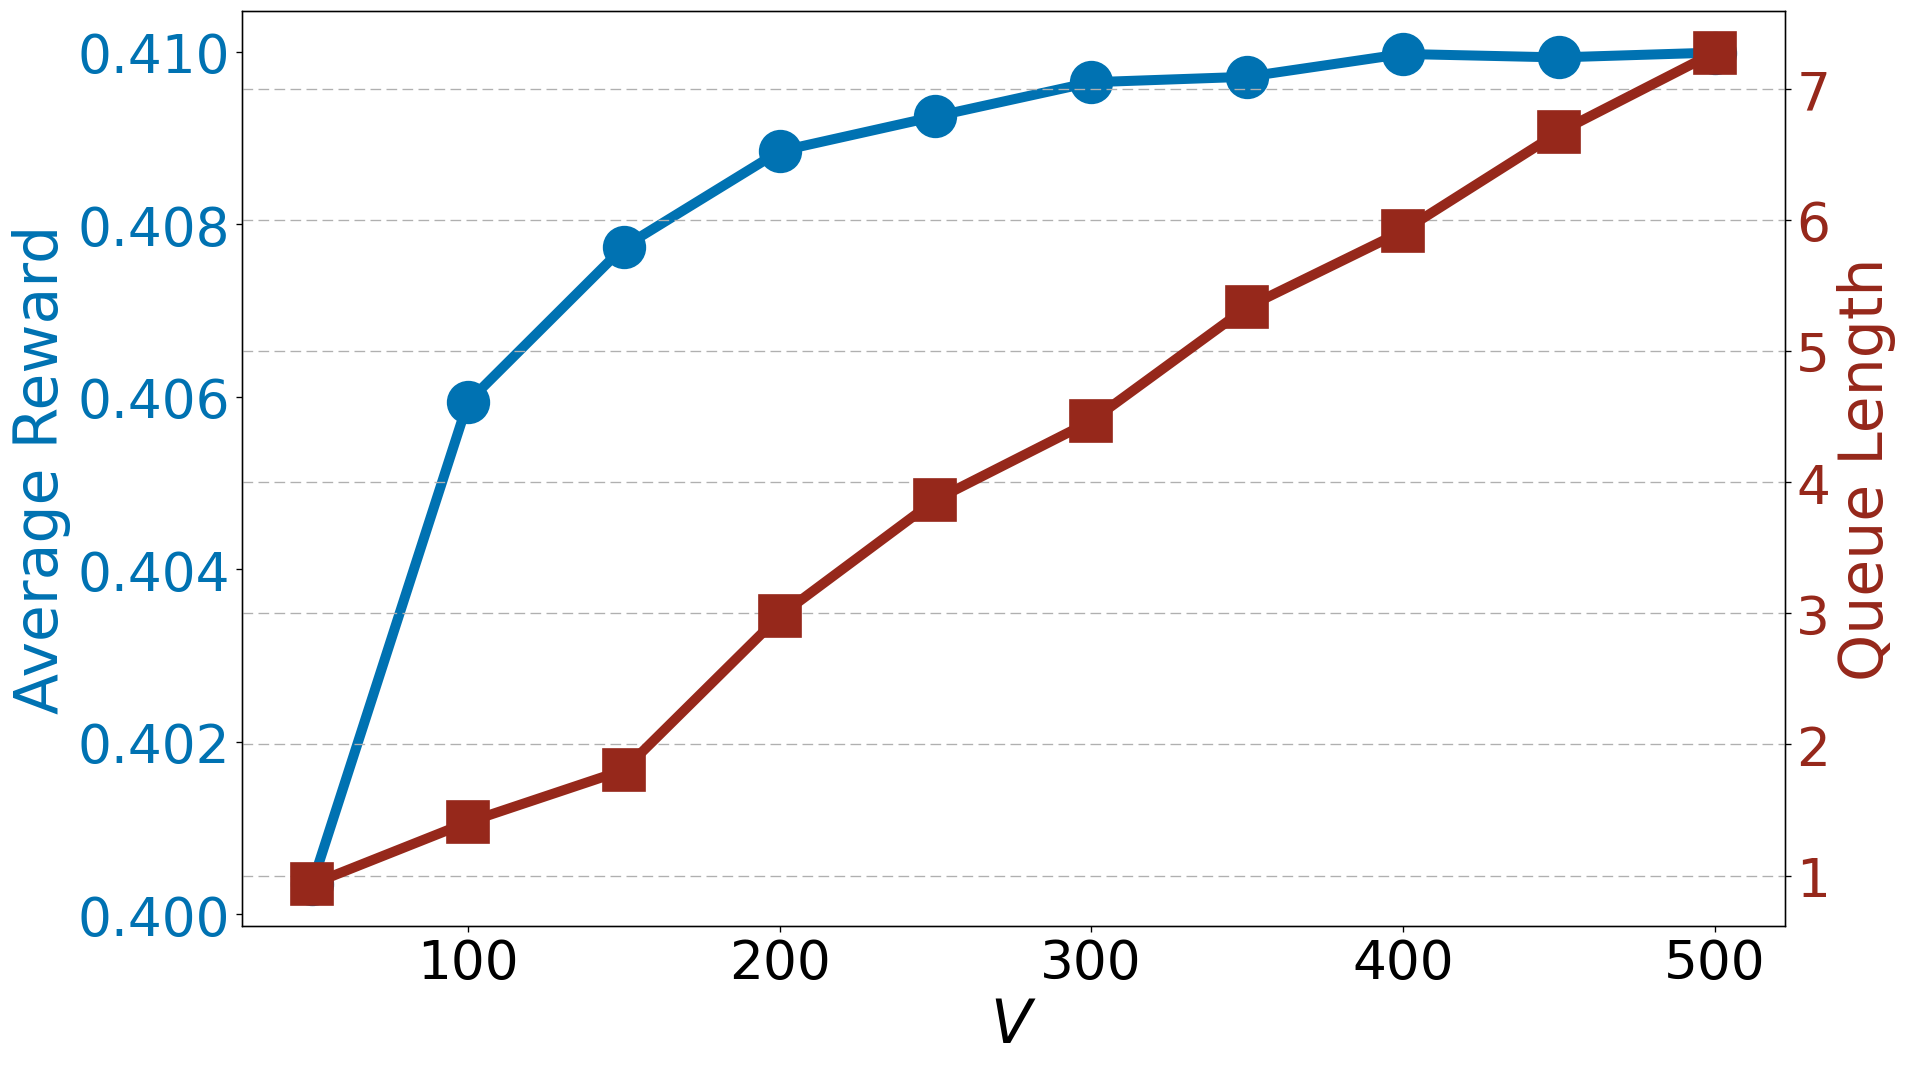

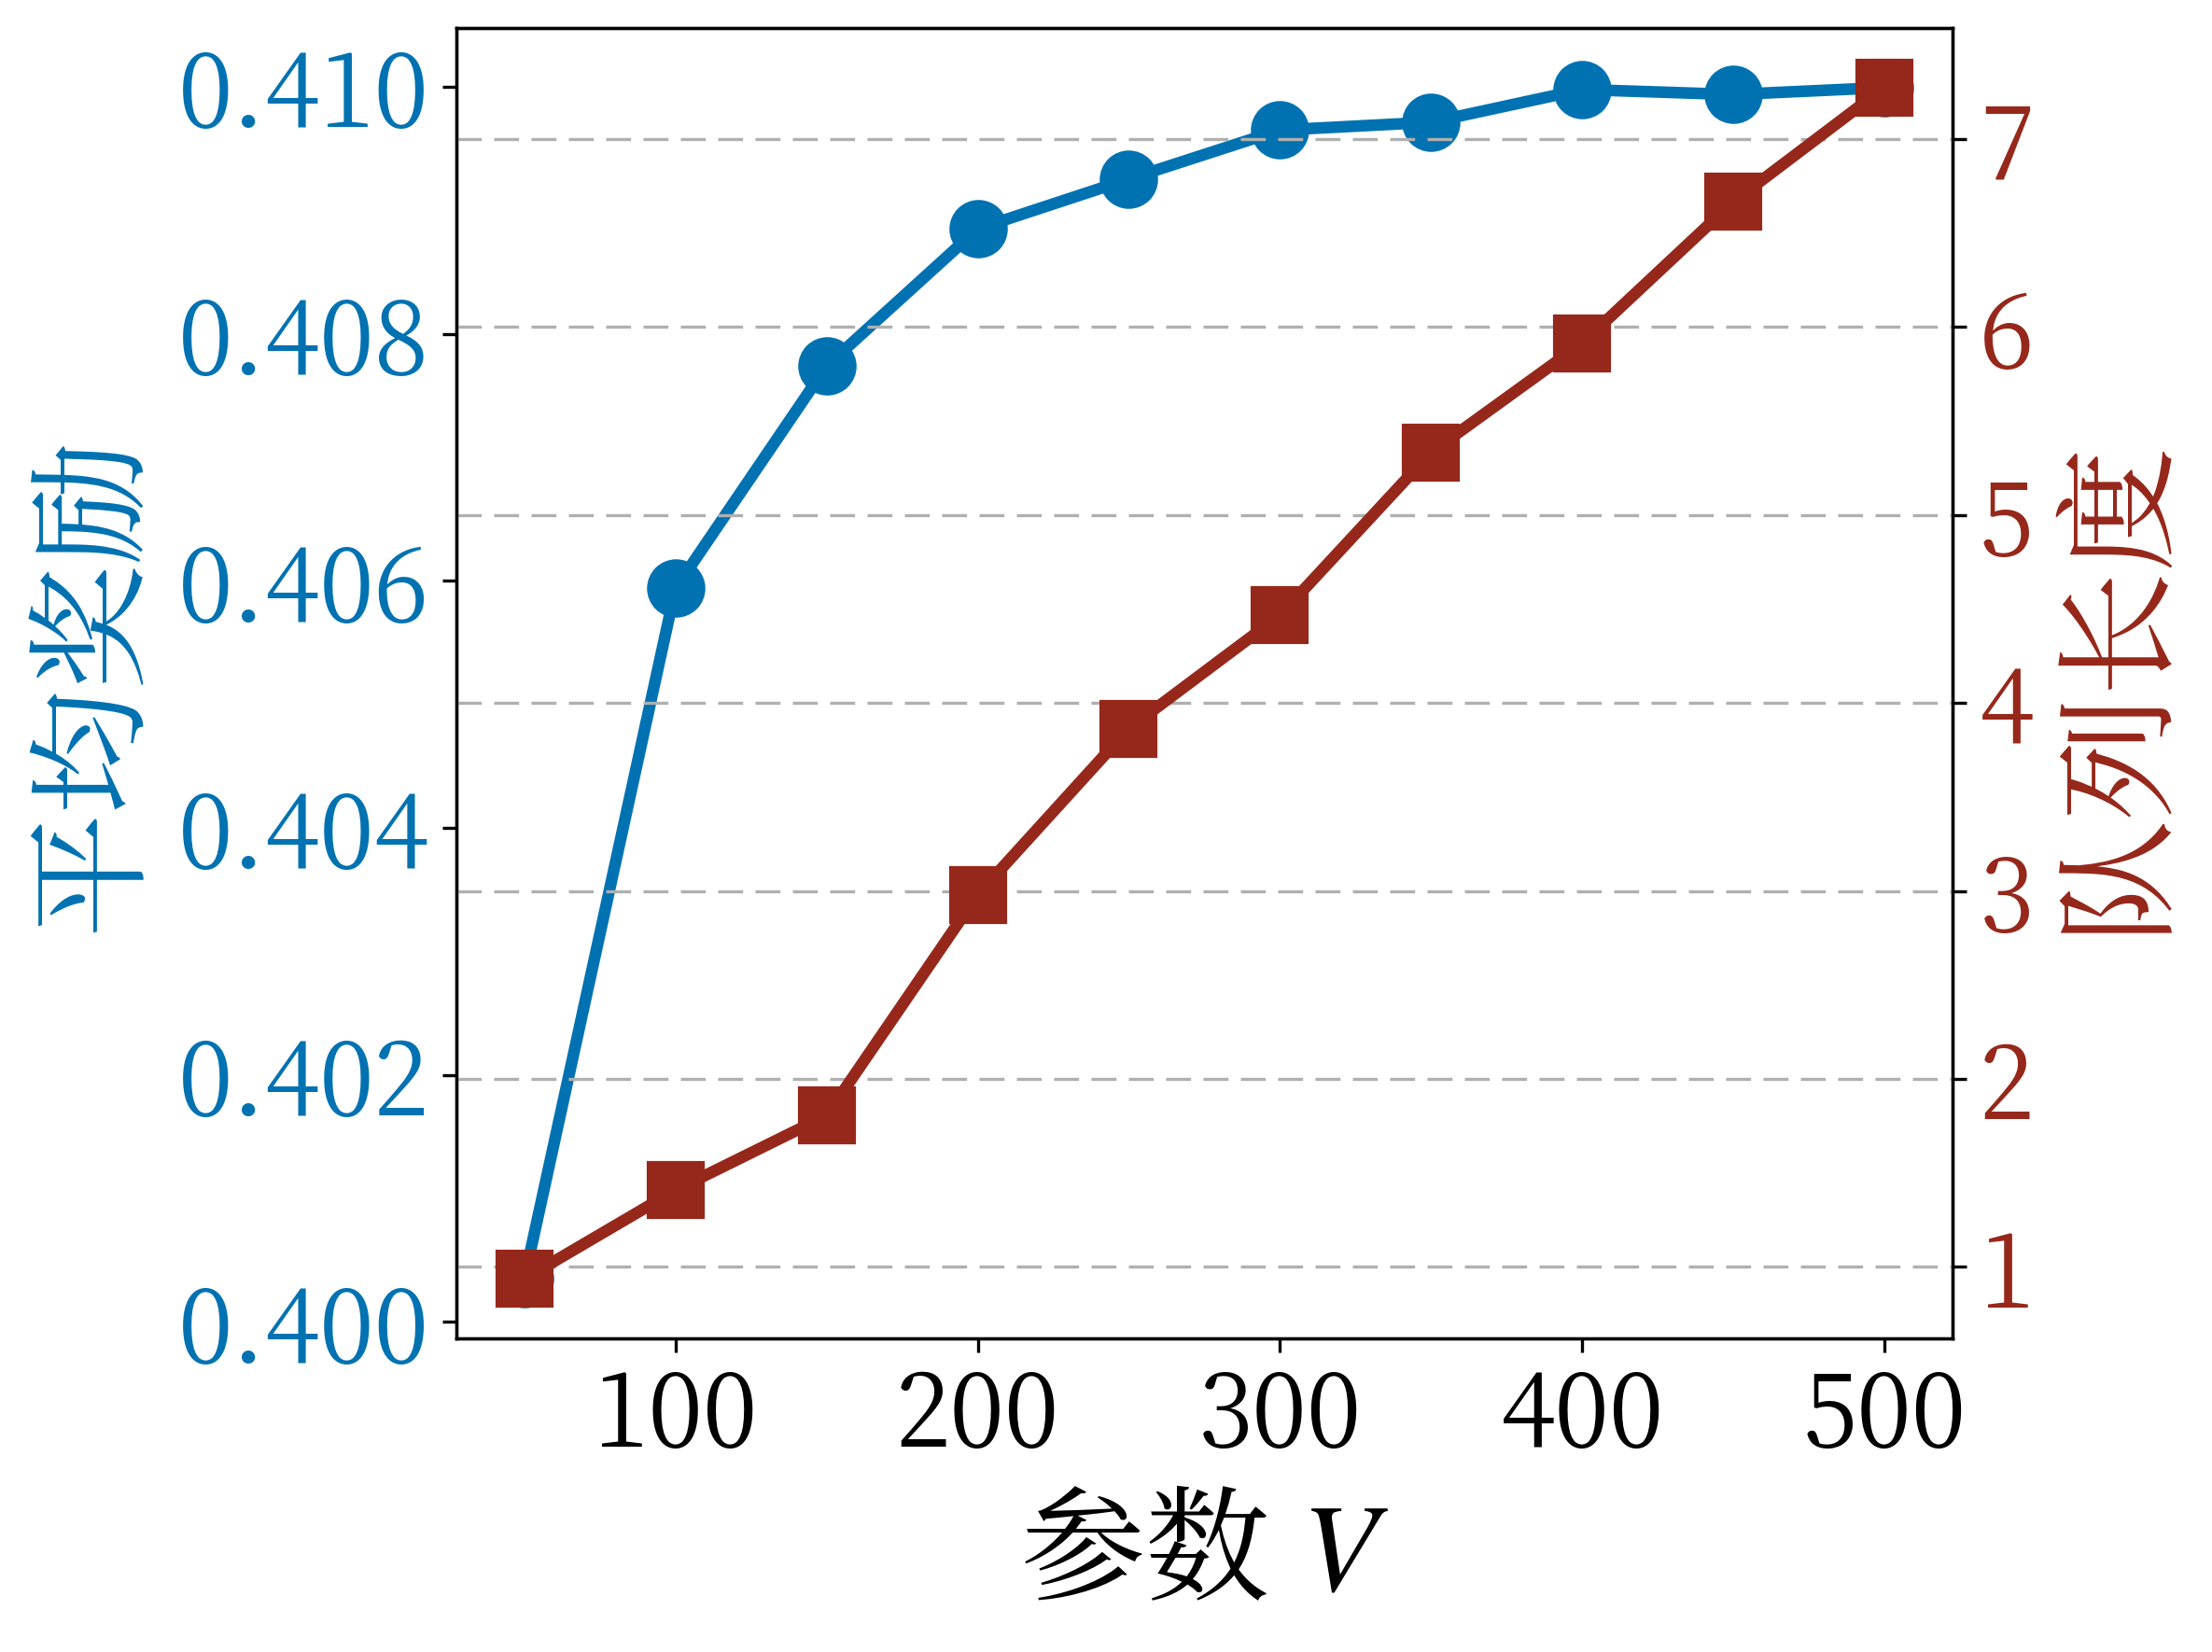

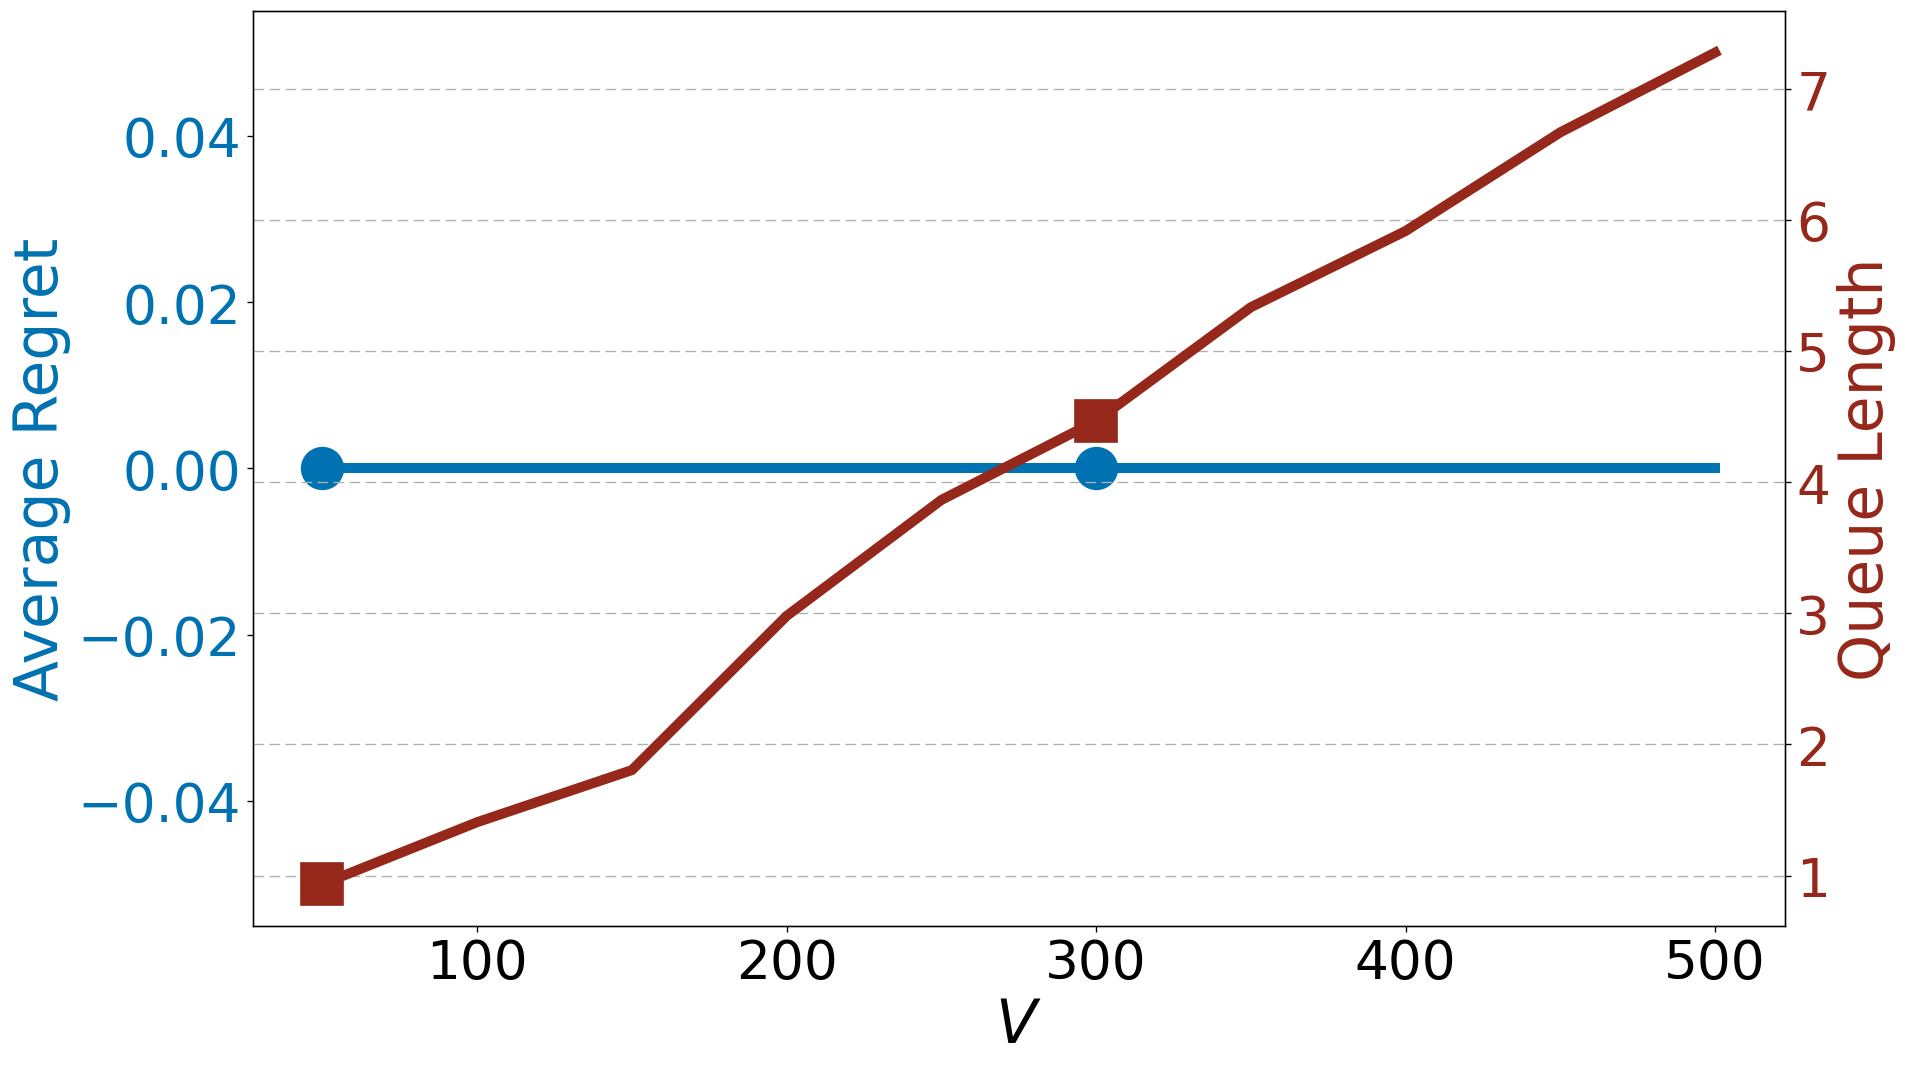

In [4]:
plot_v_simulations()


In [5]:
def plot():
    # mkdir
    Path("./simulations_data/v/{:s}/figures".format(date)).mkdir(parents=True, exist_ok=True)
    
    color_list = [ '#D55E00', '#E69F00', '#CC79A7', '#0072B2', '#009E73' ]
    marker_list = [ 'D', 's', 'o', 'v', '*' ]
    num_round = simulation_list[0].num_round
    MARK_EVERY = (num_round // 10, num_round // 5)
    MARKER_SIZE = 25.0
    LINE_WIDTH = 6.0
    FONT_SIZE = 36.0
    FONT_SIZE_TICK = 32.0
    FIG_SIZE = (16,9)
    DPI = 120
    GRID = True
    FONT_WEIGHT = "normal"
    
    time_averaged_regret_array_list = []
    cumulative_regret_array_list = []
    time_averaged_total_prediction_accuracy_array_list = []
    q_array_list = []
    time_averaged_total_prediction_latency_array_list = []
    time_averaged_energy_consumption_array_list = []
    # Only take 5 simulations to plot the normal figures since the colors and markers are limited
#     sorted_simulation_index_list_for_normal_plotting = sorted_simulation_index_list[-5:]
    sorted_simulation_index_list_for_normal_plotting = sorted_simulation_index_list[:5]
    for i in sorted_simulation_index_list_for_normal_plotting:
        metrics = calculate_metrics(i)
        
        time_averaged_regret_array_list.append(metrics["time_averaged_regret_array"])
        cumulative_regret_array_list.append(metrics["cumulative_regret_array"])
        time_averaged_total_prediction_accuracy_array_list.append(metrics["time_averaged_total_prediction_accuracy_array"])
        q_array_list.append(metrics["q_array"])
        time_averaged_total_prediction_latency_array_list.append(metrics["time_averaged_total_prediction_latency_array"])
        time_averaged_energy_consumption_array_list.append(metrics["time_averaged_energy_consumption_array"])

    # For time-averaged regret
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_fontweight(FONT_WEIGHT)
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_fontweight(FONT_WEIGHT)
    ax.set_yticks([ -0.25, -0.05, 0.15 ])
    plt.locator_params(axis='x', nbins=3)
    for index, time_averaged_regret_array in enumerate(time_averaged_regret_array_list):
        simulation_index = sorted_simulation_index_list_for_normal_plotting[index]
        agent = simulation_list[simulation_index].agent
        ax.plot(range(1, time_averaged_regret_array.shape[0] + 1), time_averaged_regret_array, marker_list[index], markevery=MARK_EVERY, linestyle='-', color=color_list[index], label=agent.name, markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=2, fontsize=20.0)
    legend = ax.legend(shadow=True, prop={ 'size': 32, 'weight': FONT_WEIGHT})
    ##############################################################################
    # For the envelope of the regret bound
    skip_first = 2
    regret_bound_envelope_list = np.zeros(time_averaged_regret_array_list[0].shape[0], dtype=float)
    for t in range(1, regret_bound_envelope_list.shape[0] + 1):
        regret_bound_envelope_list[t - 1] = 0.1 + 1 * math.sqrt(math.log(t) / t)
    ax.plot(range(1 + skip_first, regret_bound_envelope_list.shape[0] + 1), regret_bound_envelope_list[skip_first:], linestyle='-.', color="#4d2719", label=r"Envelope of $O(1/V + \sqrt{\log{T}/T})$", linewidth=LINE_WIDTH)
    ##############################################################################
    plt.grid(GRID)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.set_xlabel(r'Round ($\mathbf{\times 10^4}$)', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Avg. Regret ($\mathbf{\times 10^{-1}}$)', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    # Save the figure
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_regret.png'.format(date), format='png', bbox_extra_artists=(legend,), bbox_inches='tight')
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_regret.eps'.format(date), format='eps', bbox_extra_artists=(legend,), bbox_inches='tight')
    fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_regret.pdf'.format(date), format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
    
    # For cumulative regret
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    for index, cumulative_regret_array in enumerate(cumulative_regret_array_list):
        simulation_index = sorted_simulation_index_list_for_normal_plotting[index]
        agent = simulation_list[simulation_index].agent
        ax.plot(range(1, time_averaged_regret_array.shape[0] + 1), cumulative_regret_array, marker_list[index], markevery=MARK_EVERY, linestyle='-', color=color_list[index], label=agent.name, markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=2, fontsize=20.0)
    legend = ax.legend(shadow=True, prop={ 'size': 32, 'weight': FONT_WEIGHT})
    plt.grid(GRID)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.set_xlabel(r'Round ($\mathbf{\times 10^4}$)', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Cumulative Regret', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    # Save the figure
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_cumulative_regret.png'.format(date), format='png', bbox_extra_artists=(legend,), bbox_inches='tight')
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_cumulative_regret.eps'.format(date), format='eps', bbox_extra_artists=(legend,), bbox_inches='tight')
    fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_cumulative_regret.pdf'.format(date), format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
    
    # For time-averaged total prediction accuracy
    fig, ax = plt.subplots(figsize=(10,6), dpi=200)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    for index, time_averaged_total_prediction_accuracy_array in enumerate(time_averaged_total_prediction_accuracy_array_list):
        simulation_index = sorted_simulation_index_list_for_normal_plotting[index]
        agent = simulation_list[simulation_index].agent
        ax.plot(range(1, time_averaged_total_prediction_accuracy_array.shape[0] + 1), time_averaged_total_prediction_accuracy_array, marker_list[index], markevery=MARK_EVERY, linestyle='-', color=color_list[index], label=agent.name, markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=2, fontsize=20.0)
    legend = ax.legend(shadow=True, prop={ 'size': 32, 'weight': FONT_WEIGHT})
    plt.grid(GRID)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.set_xlabel(r'Round ($\mathbf{\times 10^4}$)', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Average Prediction Accuracy', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    # Save the figure
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_total_prediction_accuracy.png'.format(date), bbox_extra_artists=(legend,), format='png', bbox_inches='tight')
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_total_prediction_accuracy.eps'.format(date), bbox_extra_artists=(legend,), format='eps', bbox_inches='tight')
    fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_total_prediction_accuracy.pdf'.format(date), bbox_extra_artists=(legend,), format='pdf', bbox_inches='tight')
    
    # For queue length
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_fontweight(FONT_WEIGHT)
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_fontweight(FONT_WEIGHT)
    ax.set_yticks([ 0, 200, 400 ])
#     ax.set_yticklabels(['0.0', '2.0', '4.0'], fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.locator_params(axis='x', nbins=3)
    for index, q_array in enumerate(q_array_list):
        if q_array is None:
            continue
        
        simulation_index = sorted_simulation_index_list_for_normal_plotting[index]
        agent = simulation_list[simulation_index].agent
        ax.plot(range(q_array.shape[0]), q_array, marker_list[index], markevery=MARK_EVERY, linestyle='-', color=color_list[index], label=agent.name, markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=2, fontsize=20.0)
    legend = ax.legend(loc=(0.30, 0.58), shadow=True, ncol=2, prop={ 'size': 32, 'weight': 'bold'})
    plt.grid(GRID)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.set_xlabel(r'Round ($\mathbf{\times 10^4}$)', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel('Queue Length ($\\mathbf{\\times 10^2}$)\n', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
#     #########################
#     # For inset
#     axins = ax.inset_axes([0.10, 0.25, 0.45, 0.45])
#     for index, q_array in enumerate(q_array_list):
#         if q_array is None:
#             continue
        
#         simulation_index = sorted_simulation_index_list[index]
#         agent = simulation_list[simulation_index].agent
#         axins.plot(range(10, 2000 + 1), q_array[10:2000+1], marker_list[index], markevery=100, linestyle='-', color=color_list[index], label=agent.name, markersize=4.0)
#     x1, x2, y1, y2 = 10, 2000, 0.0, 20.0
#     axins.set_xlim(x1, x2)
#     axins.set_ylim(y1, y2)
# #     axins.set_xticklabels('')
# #     axins.set_yticklabels('')
#     ax.indicate_inset_zoom(axins)
#     #########################
    # Save the figure
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_queue_length.png'.format(date), format='png', bbox_extra_artists=(legend,), bbox_inches='tight')
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_queue_length.eps'.format(date), format='eps', bbox_extra_artists=(legend,), bbox_inches='tight')
    fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_queue_length.pdf'.format(date), format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
    
    # For time-averaged total prediction latency
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    for index, time_averaged_total_prediction_latency_array in enumerate(time_averaged_total_prediction_latency_array_list):
        simulation_index = sorted_simulation_index_list_for_normal_plotting[index]
        agent = simulation_list[simulation_index].agent
        ax.plot(range(1, time_averaged_total_prediction_latency_array.shape[0] + 1), time_averaged_total_prediction_latency_array, marker_list[index], markevery=MARK_EVERY, linestyle='-', color=color_list[index], label=agent.name, markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=2, fontsize=20.0)
    legend = ax.legend(shadow=True, prop={ 'size': 32, 'weight': FONT_WEIGHT})
    plt.grid(GRID)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.set_xlabel(r'Round ($\mathbf{\times 10^4}$)', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Average Prediction Latency', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    # Save the figure
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_total_prediction_latency.png'.format(date), format='png', bbox_extra_artists=(legend,), bbox_inches='tight')
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_total_prediction_latency.eps'.format(date), format='eps', bbox_extra_artists=(legend,), bbox_inches='tight')
    fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_total_prediction_latency.pdf'.format(date), format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
    
    # For time-averaged energy consumption
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    for index, time_averaged_energy_consumption_array in enumerate(time_averaged_energy_consumption_array_list):
        simulation_index = sorted_simulation_index_list_for_normal_plotting[index]
        agent = simulation_list[simulation_index].agent
        ax.plot(range(1, time_averaged_energy_consumption_array.shape[0] + 1), time_averaged_energy_consumption_array, marker_list[index], markevery=MARK_EVERY, linestyle='-', color=color_list[index], label=agent.name, markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
    plt.hlines(simulation_list[0].env.b, 0, simulation_list[0].num_round + 2, colors='#f22613', linestyles='dashdot')
#     legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=2, fontsize=20.0)
    legend = ax.legend(shadow=True, prop={ 'size': 32, 'weight': FONT_WEIGHT})
    plt.grid(GRID)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.set_xlabel(r'Round ($\mathbf{\times 10^4}$)', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Average Energy Consumption', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    # Save the figure
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_energy_consumption.png'.format(date), format='png', bbox_extra_artists=(legend,), bbox_inches='tight')
#     fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_energy_consumption.eps'.format(date), format='eps', bbox_extra_artists=(legend,), bbox_inches='tight')
    fig.savefig('./simulations_data/v/{:s}/figures/fig_inference_v_time_averaged_energy_consumption.pdf'.format(date), format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')


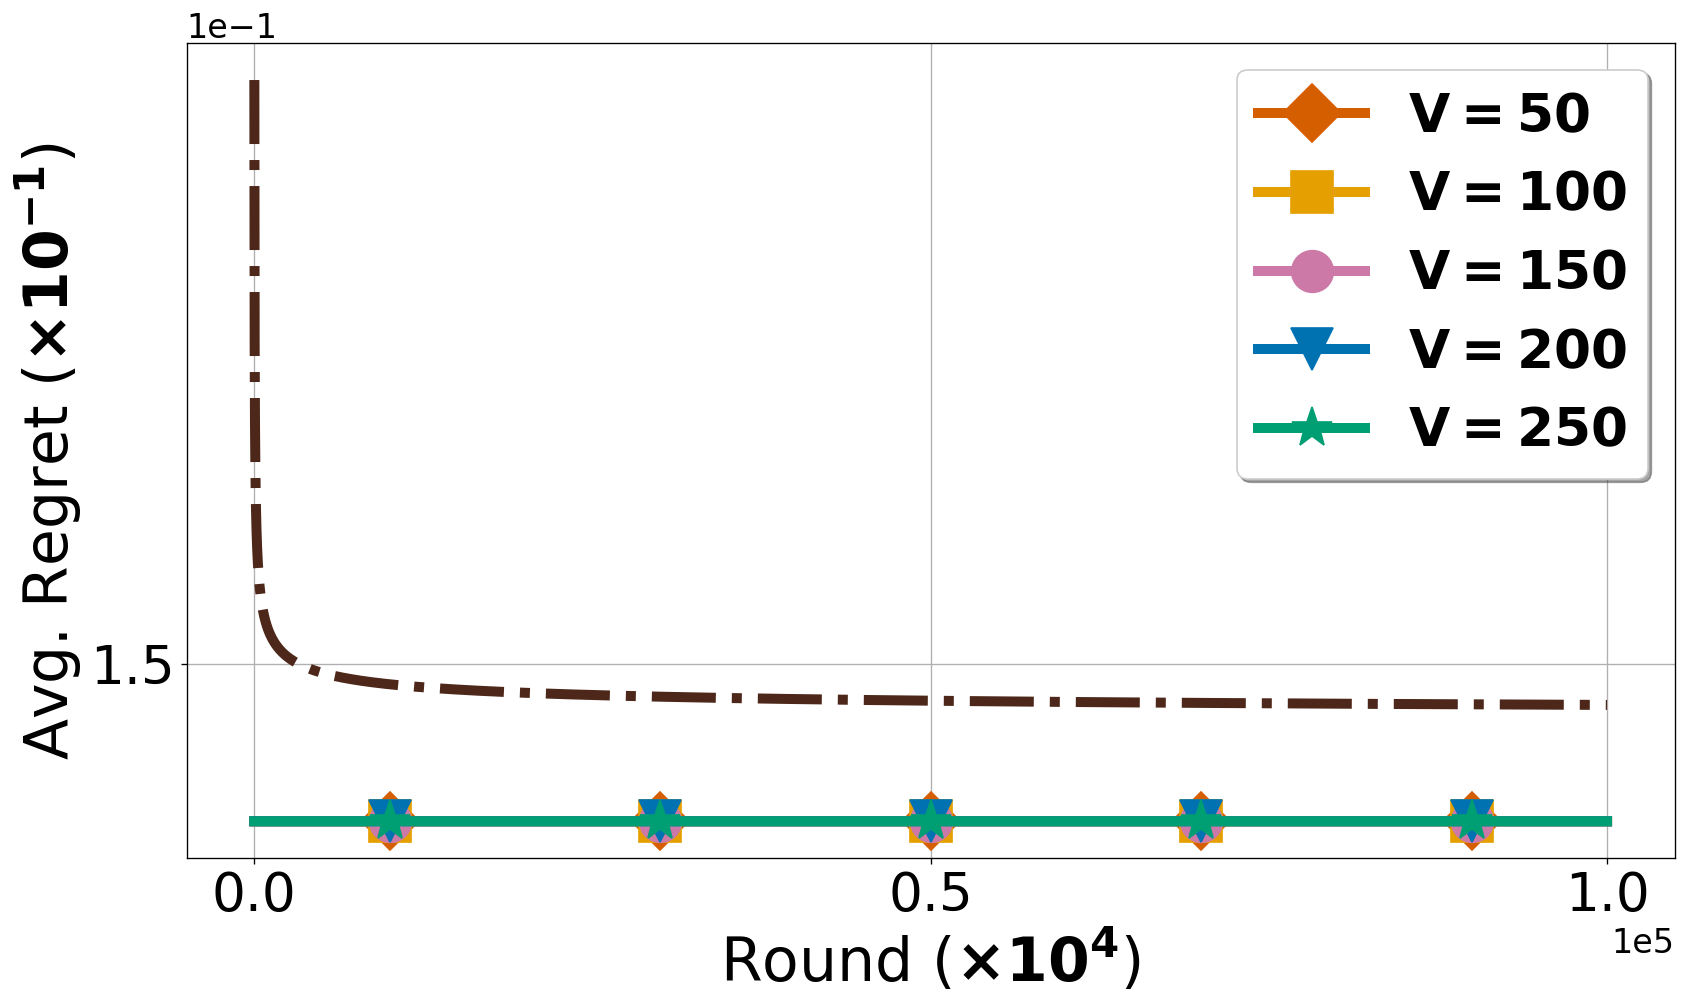

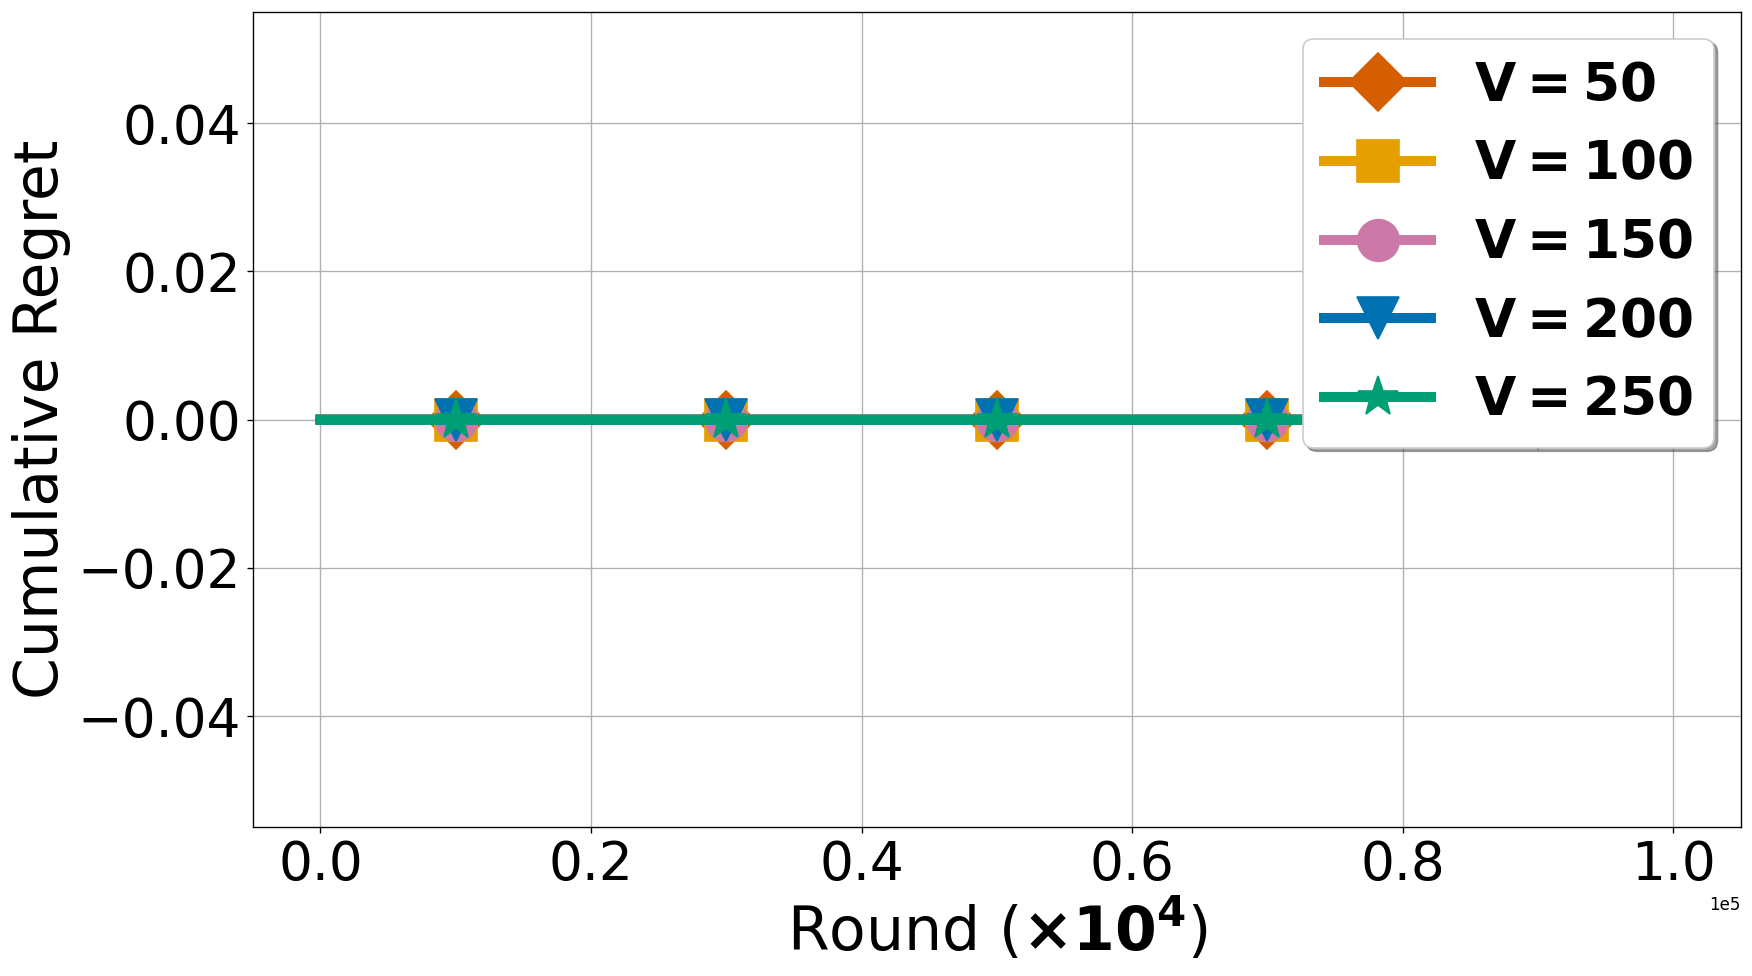

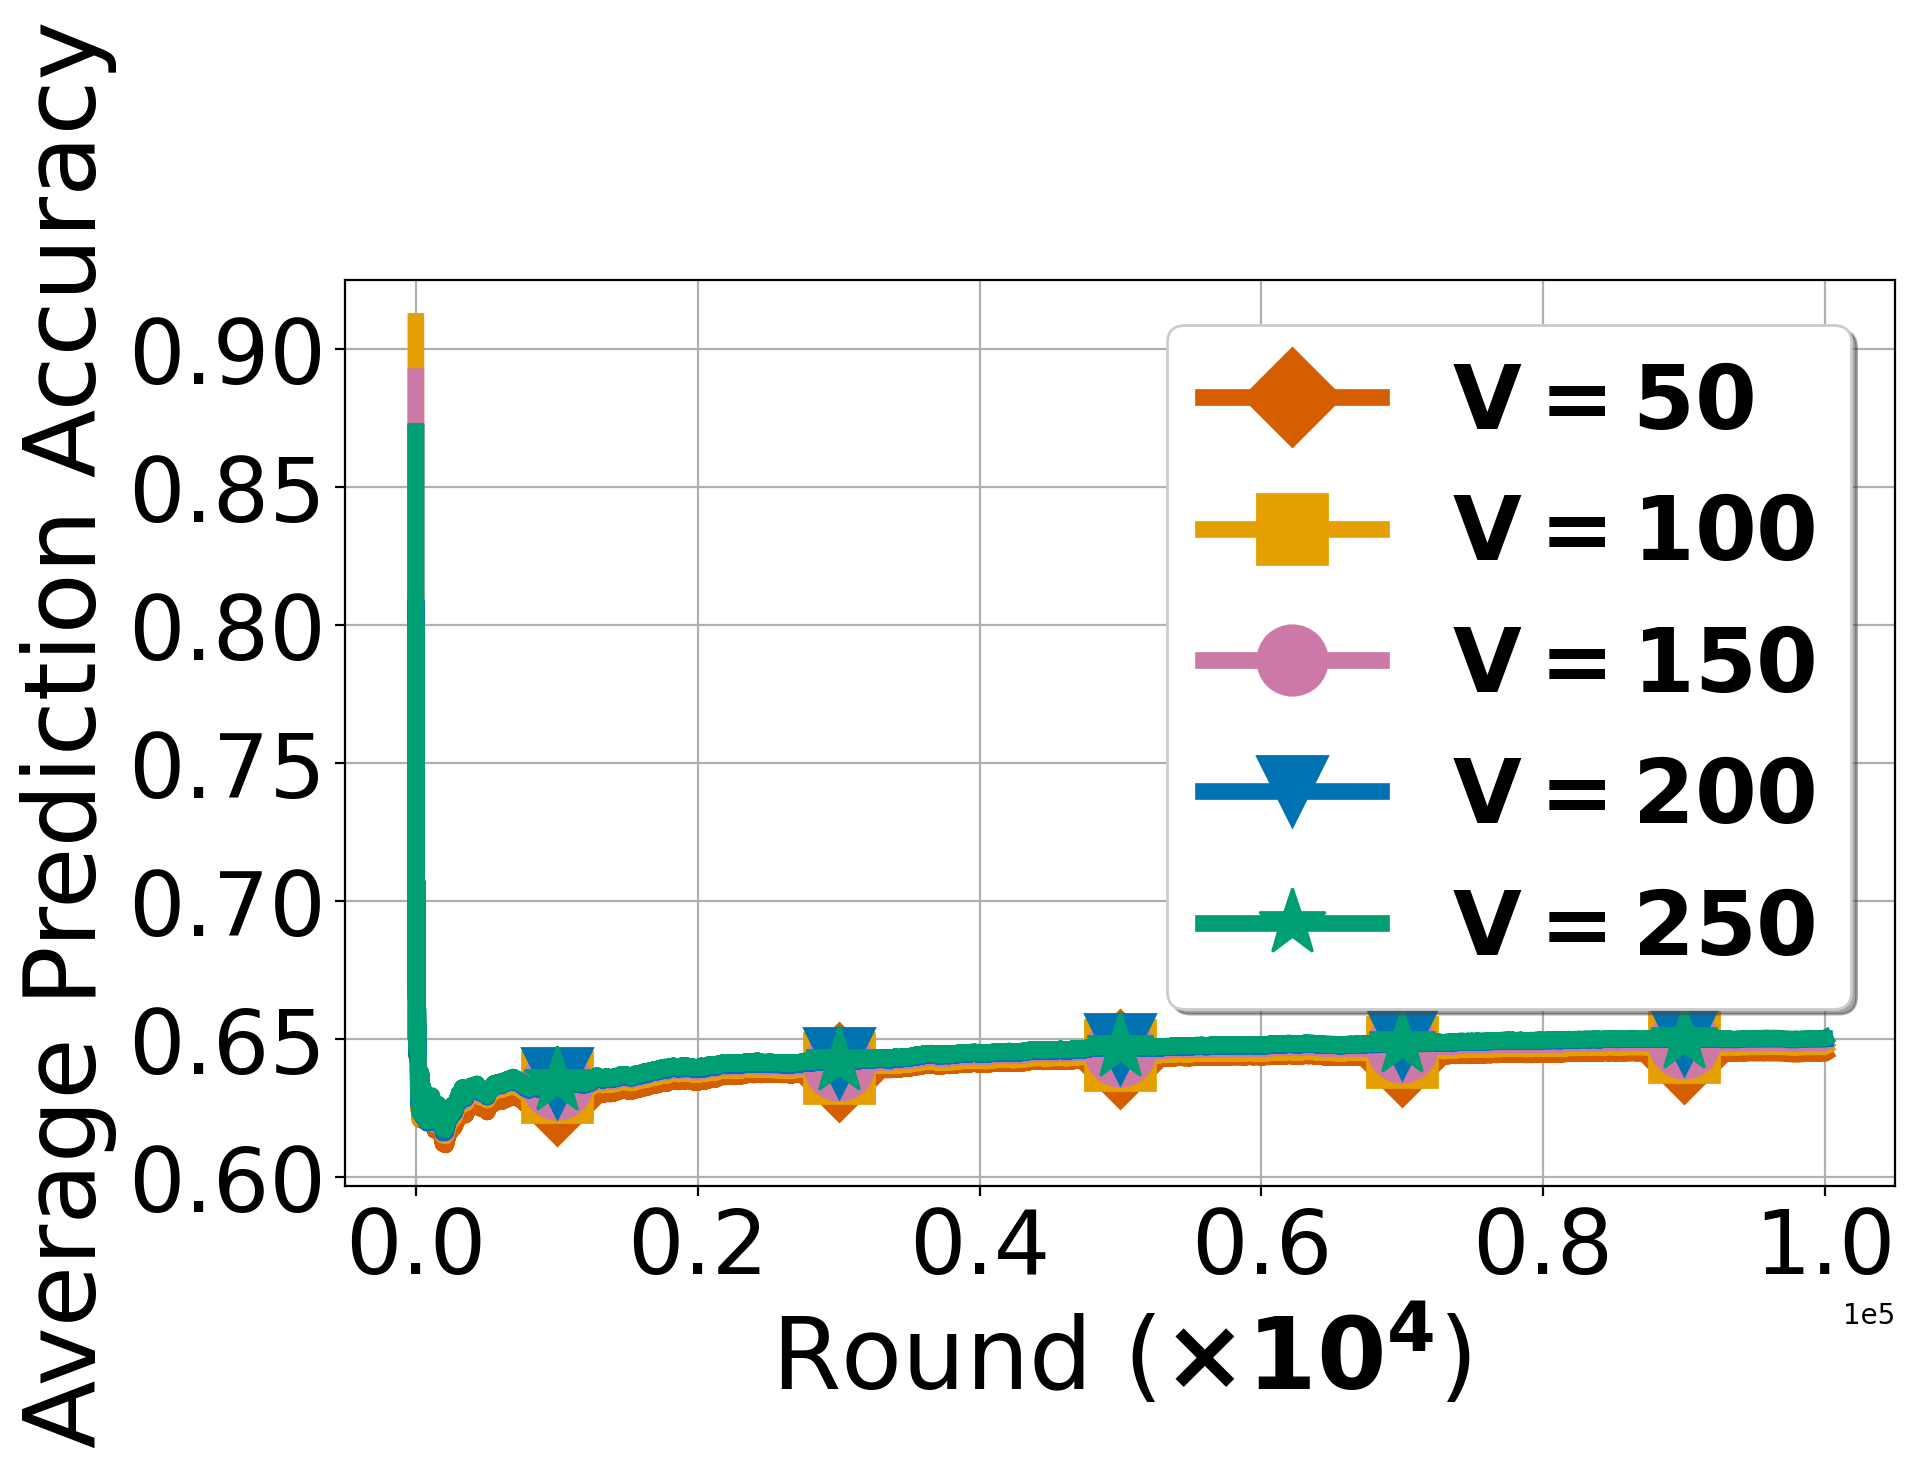

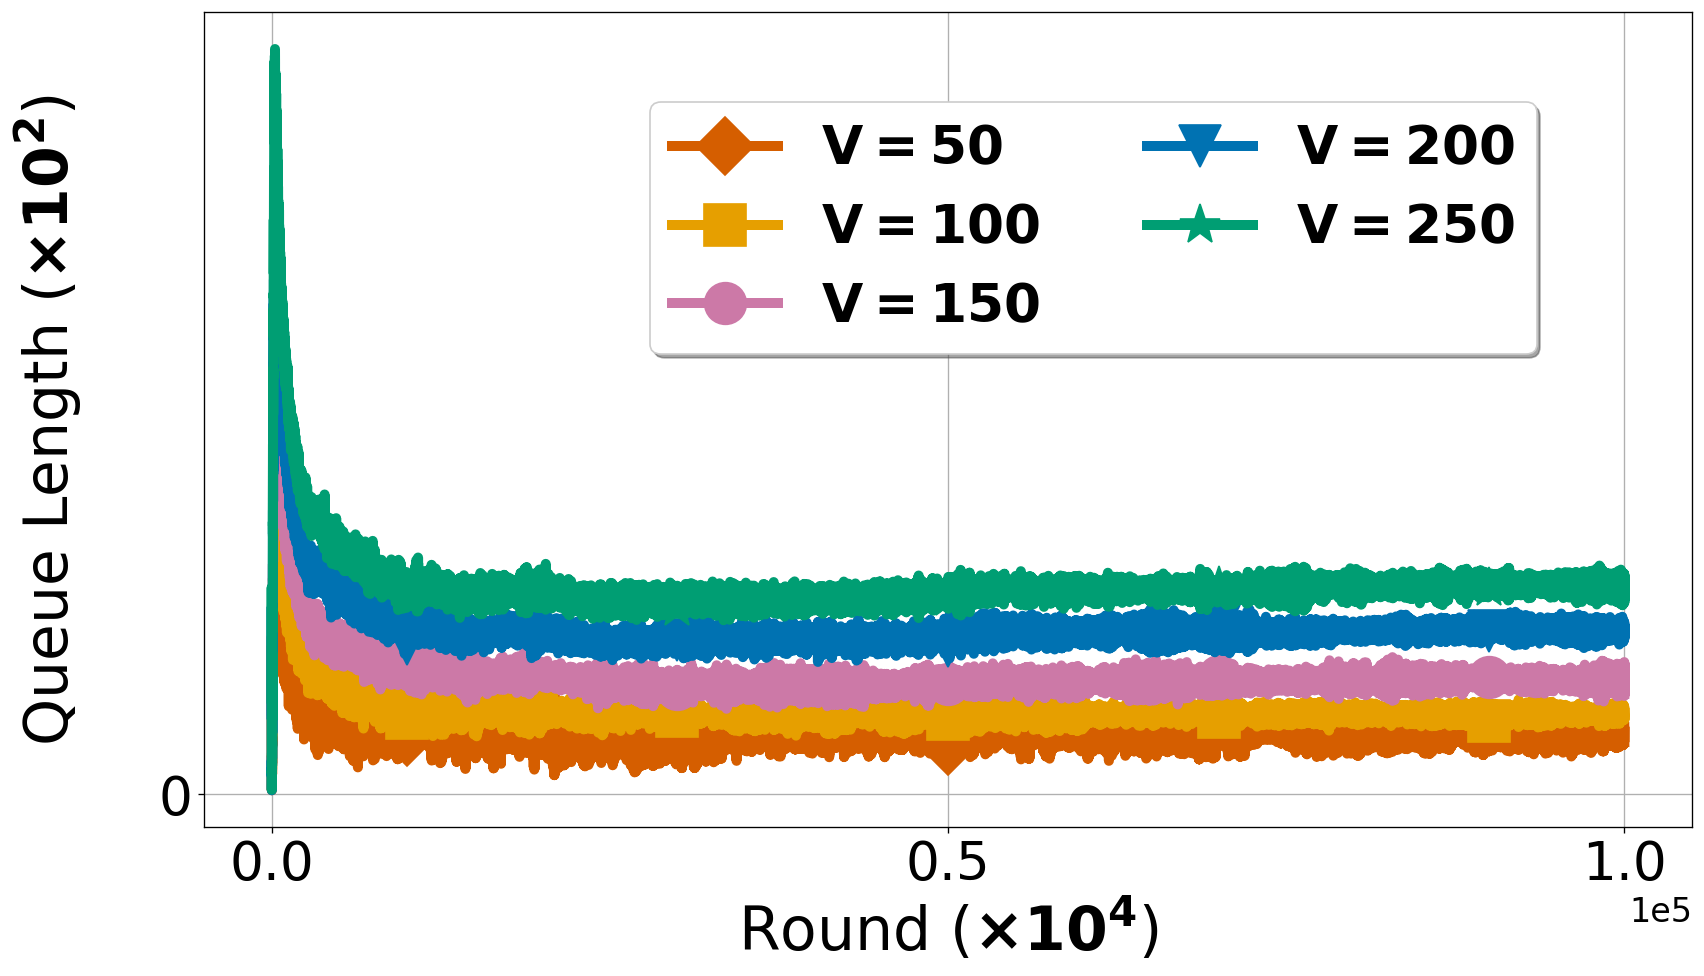

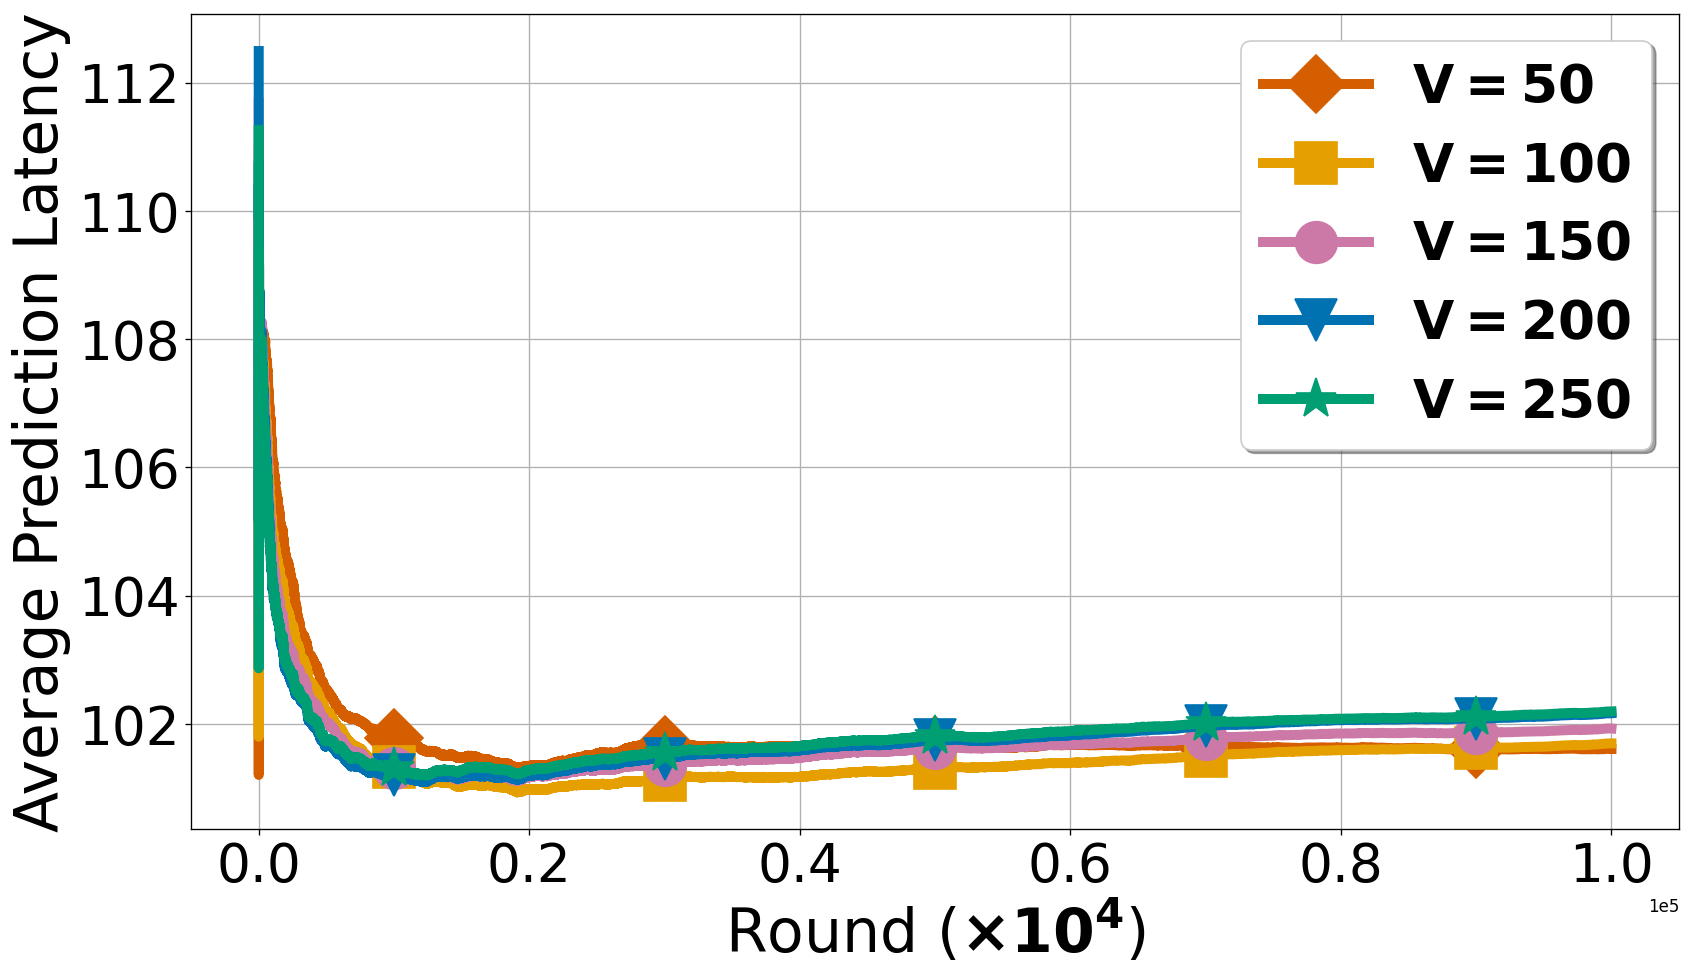

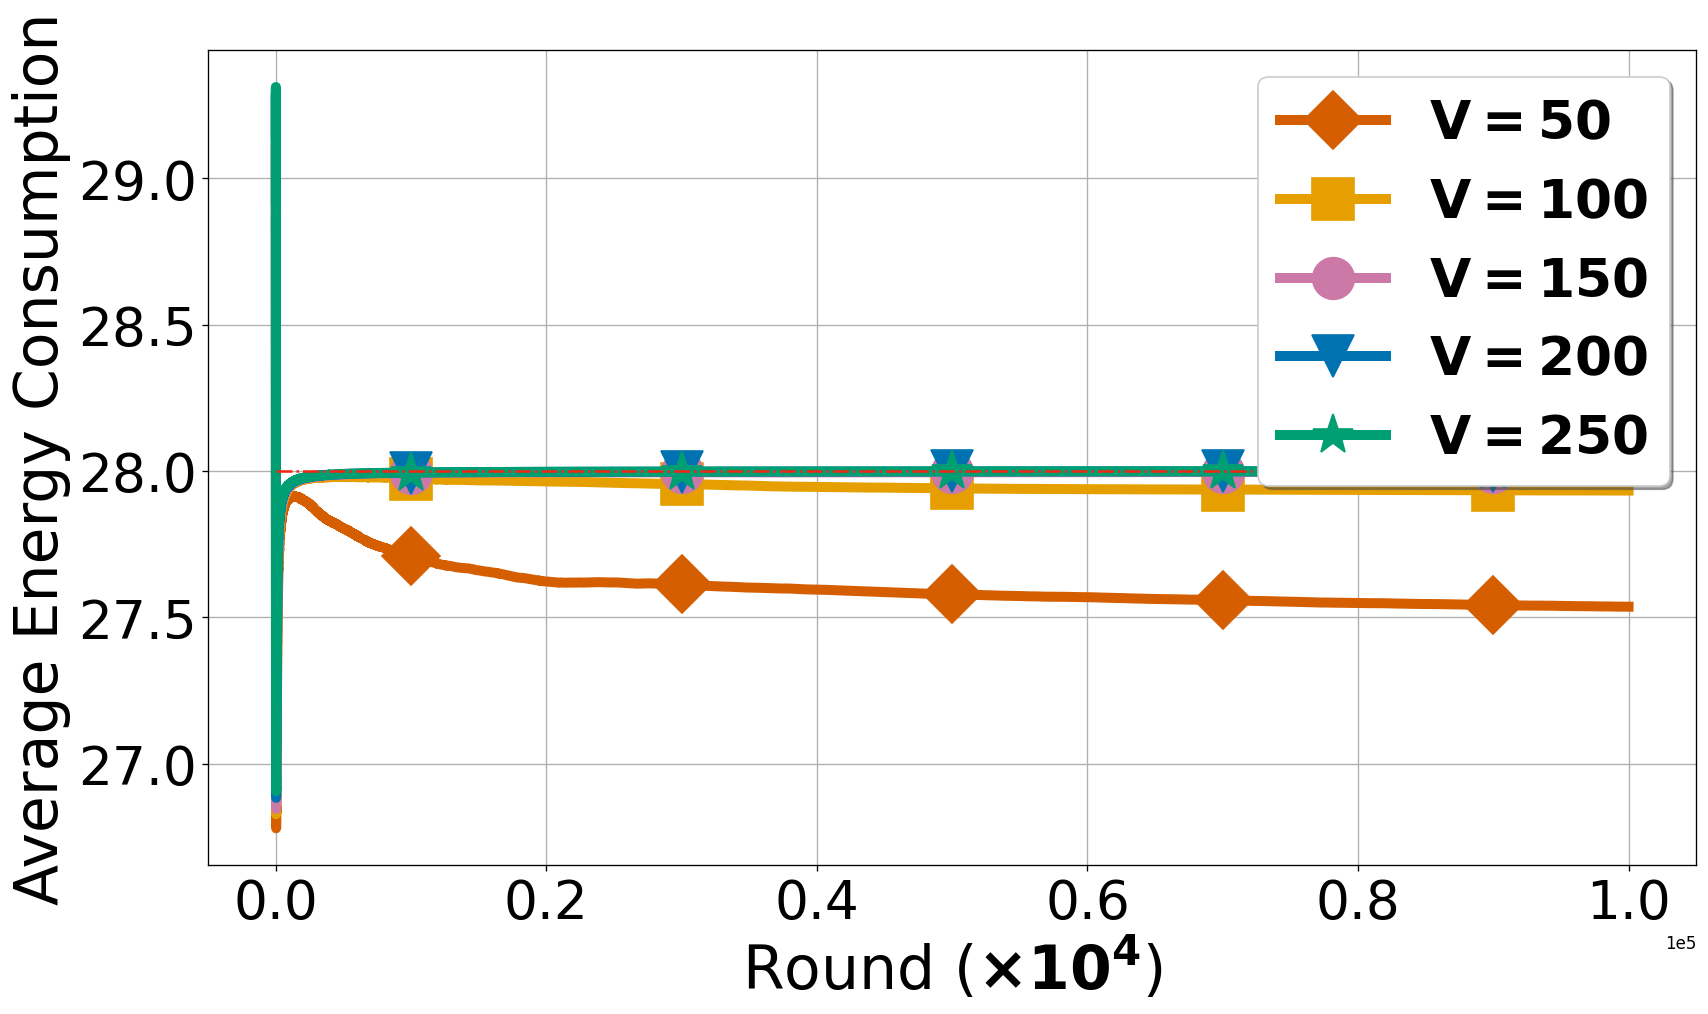

In [6]:
plot()